In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') #for not showing warnings messages 

# Data Exploration

In [3]:
all_data = pd.read_csv("F:\ITI BI\MeriSkill\Projects\Project 3 - HR Analytics/HR-Employee-Attrition.csv")
all_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
all_data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
all_data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

# Deleting redundant columns

In [7]:
all_data.drop(["EmployeeCount","Over18","StandardHours"],axis = 1 , inplace =True)

# Renaming the columns

In [8]:
all_data = all_data.rename(columns={'Education':'LevelOfEducation', 'NumCompaniesWorked':'NumofCompaniesWorked'})

In [9]:
# Create a new column to classify age
all_data['AgeClassification'] = pd.cut(all_data['Age'], bins=[18, 25, 40, 60], labels=['Young(18-25)', 'Middle(25-40)', 'Elderly(40-60)'])

# Print the new column
print(all_data['AgeClassification'])

0       Elderly(40-60)
1       Elderly(40-60)
2        Middle(25-40)
3        Middle(25-40)
4        Middle(25-40)
             ...      
1465     Middle(25-40)
1466     Middle(25-40)
1467     Middle(25-40)
1468    Elderly(40-60)
1469     Middle(25-40)
Name: AgeClassification, Length: 1470, dtype: category
Categories (3, object): ['Young(18-25)' < 'Middle(25-40)' < 'Elderly(40-60)']


# Search for dublicates

In [10]:
# Identify duplicate rows
duplicate_rows = all_data[all_data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, LevelOfEducation, EducationField, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumofCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, AgeClassification]
Index: []

[0 rows x 33 columns]


# Data Exploration

In [11]:
all_data.describe()

,Age,DailyRate,DistanceFromHome,LevelOfEducation,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
columns = pd.DataFrame(all_data)
# Get all column names as an Index object
column_names = columns.columns
print(column_names )

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'LevelOfEducation', 'EducationField',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumofCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'AgeClassification'],
      dtype='object')


In [13]:
# Group the data by Result and count the number of times each value appears
value_counts = all_data['Attrition'].value_counts()

# Get the order of the Result values
order = value_counts.index.to_list()
value_counts

No     1233
Yes     237
Name: Attrition, dtype: int64

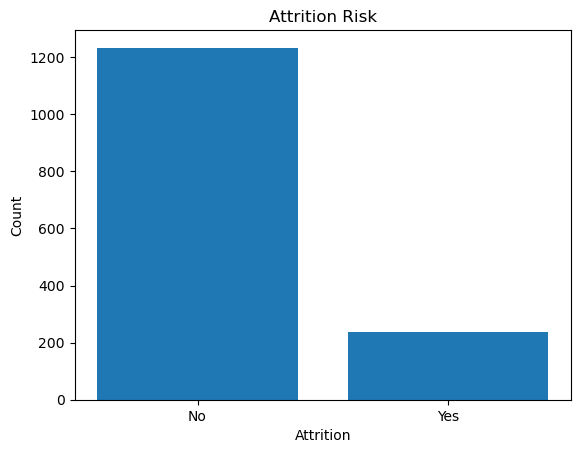

In [14]:
# Create a bar chart
plt.bar(order, value_counts)

# Set the title and labels
plt.title('Attrition Risk')
plt.xlabel('Attrition')
plt.ylabel('Count')

# Show the plot
plt.show()

# Age Classification vs Attrition

In [15]:
yes_attrition = all_data[(all_data['Attrition'] =='Yes')].groupby("AgeClassification")['Attrition'].count()
print(yes_attrition)

print('*************************')

no_attrition = all_data[(all_data['Attrition'] =='No')].groupby("AgeClassification")['Attrition'].count()
print(no_attrition)

# Show the plot
#plt.show()

AgeClassification
Young(18-25)       40
Middle(25-40)     141
Elderly(40-60)     52
Name: Attrition, dtype: int64
*************************
AgeClassification
Young(18-25)       75
Middle(25-40)     741
Elderly(40-60)    413
Name: Attrition, dtype: int64


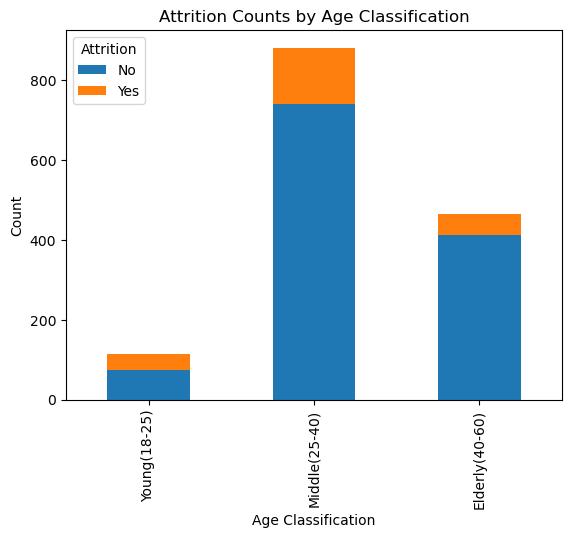

In [16]:
# Group the data by 'AgeClassification' and 'Attrition' and count the occurrences
attrition_counts = all_data.groupby(['AgeClassification', 'Attrition']).size().unstack(fill_value=0)

# Plot a bar chart
attrition_counts.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Age Classification')
plt.ylabel('Count')
plt.title('Attrition Counts by Age Classification')

# Show the legend
plt.legend(title='Attrition', loc='upper left')

# Show the plot
plt.show()

# Career Progress vs Attrition 

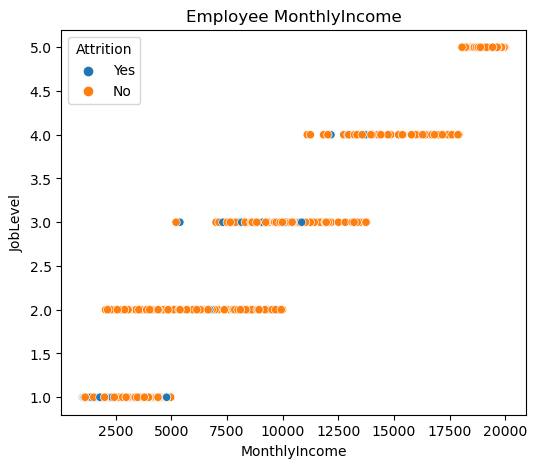

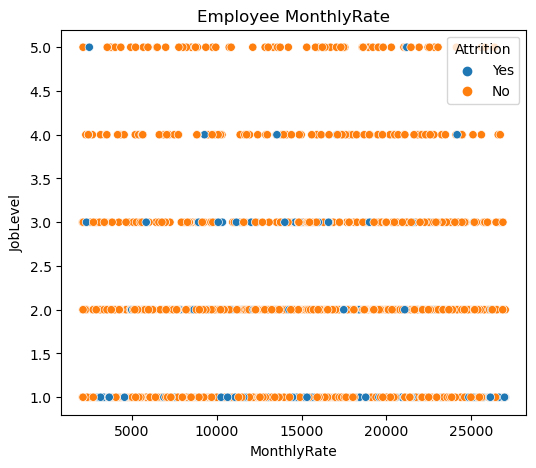

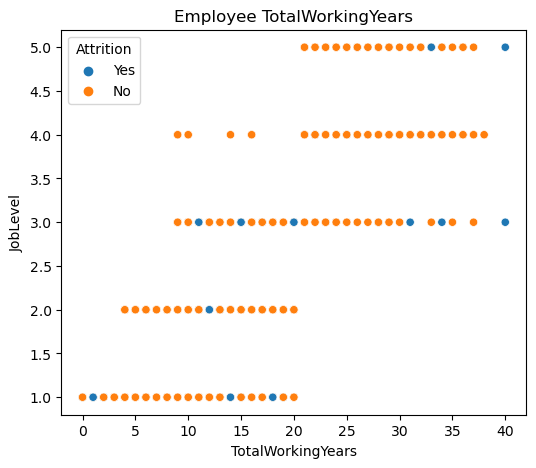

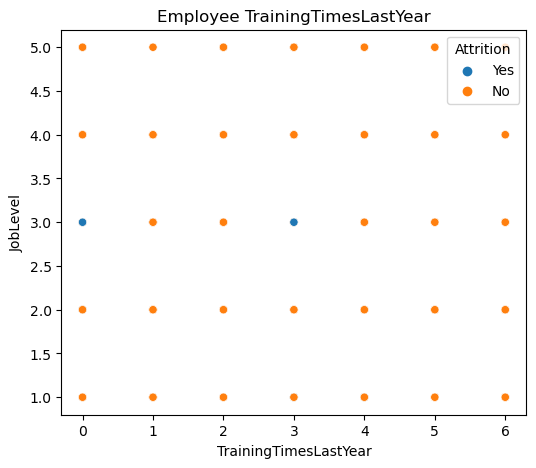

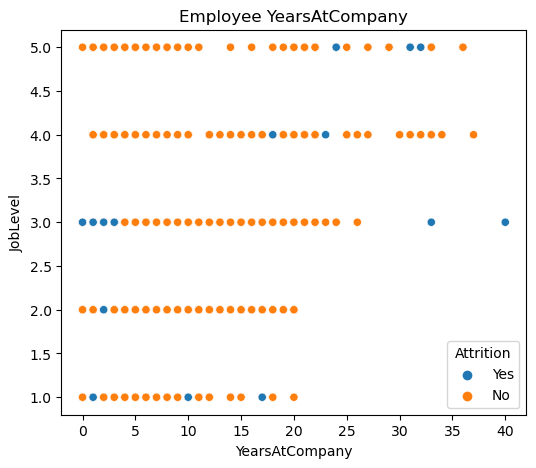

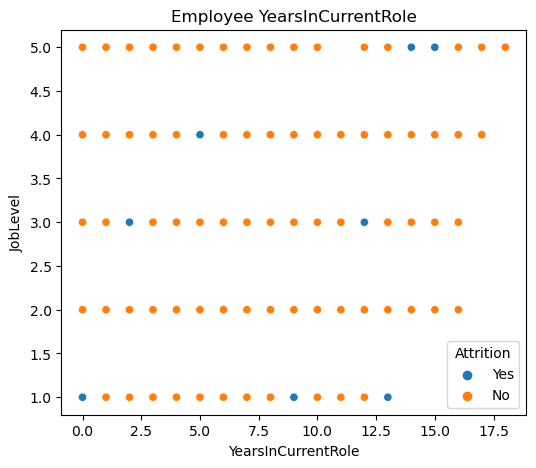

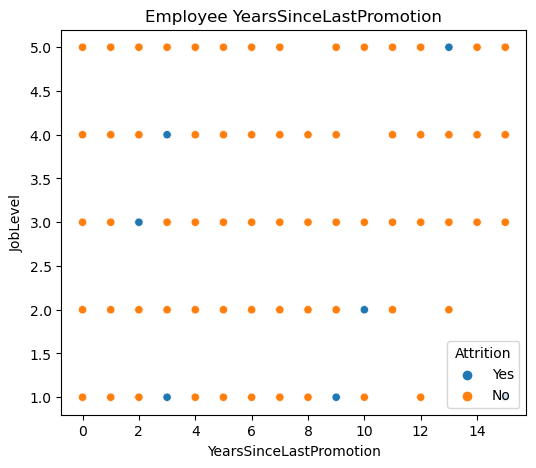

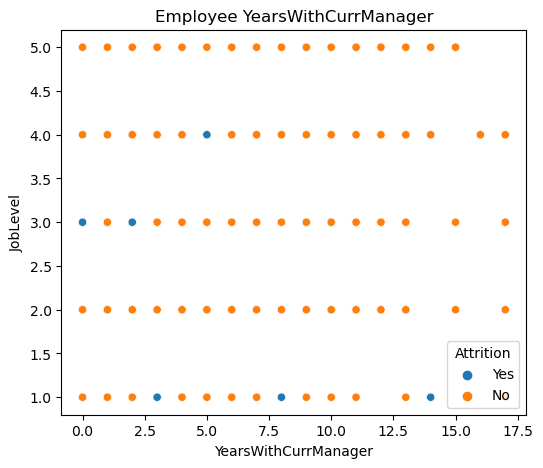

In [17]:
dimensions = ['MonthlyIncome','MonthlyRate','TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

for i in dimensions:
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=i , y = 'JobLevel' , hue = 'Attrition' , data = all_data)
    plt.title(f"Employee {i}")
    plt.show()

In [18]:
dimensions = [ 'BusinessTravel','Department','EducationField', 'Gender','JobRole', 'MaritalStatus','OverTime']

for i in dimensions:
    value_counts = all_data[i].value_counts().sort_index()
    print(f'Counts for {i}')
    print(value_counts)
    print('*************************')
    

Counts for BusinessTravel
Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
Name: BusinessTravel, dtype: int64
*************************
Counts for Department
Human Resources            63
Research & Development    961
Sales                     446
Name: Department, dtype: int64
*************************
Counts for EducationField
Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132
Name: EducationField, dtype: int64
*************************
Counts for Gender
Female    588
Male      882
Name: Gender, dtype: int64
*************************
Counts for JobRole
Healthcare Representative    131
Human Resources               52
Laboratory Technician        259
Manager                      102
Manufacturing Director       145
Research Director             80
Research Scientist           292
Sales Executive              326
Sales Representative          83
Name: JobRole, dtype

# Attrition By BusinessTravel

In [33]:
values = all_data[all_data['Attrition']=='Yes'].groupby('BusinessTravel')['Attrition'].size().reset_index()
print(values)

      BusinessTravel  Attrition
0         Non-Travel         12
1  Travel_Frequently         69
2      Travel_Rarely        156


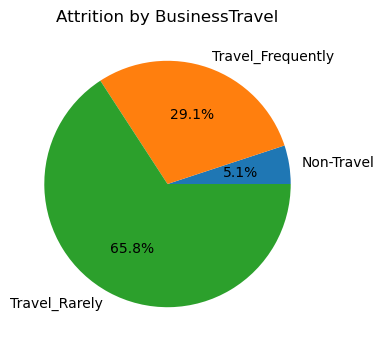

In [38]:
plt.figure(figsize=(4,4))
plt.pie(values['Attrition'], labels= values['BusinessTravel'] , autopct = '%1.1f%%')
plt.title('Attrition by BusinessTravel')
plt.show()

# Attrition By Department

In [39]:
values = all_data[all_data['Attrition']=='Yes'].groupby('Department')['Attrition'].size().reset_index()
print(values)

               Department  Attrition
0         Human Resources         12
1  Research & Development        133
2                   Sales         92


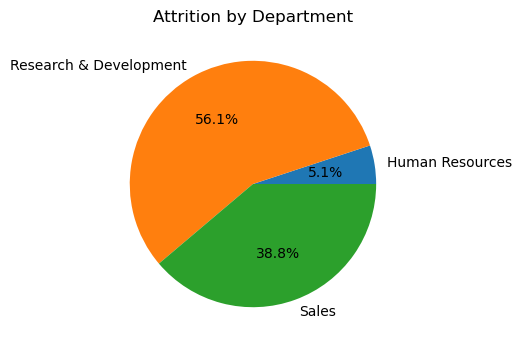

In [40]:
plt.figure(figsize=(4,4))
plt.pie(values['Attrition'], labels= values['Department'] , autopct = '%1.1f%%')
plt.title('Attrition by Department')
plt.show()

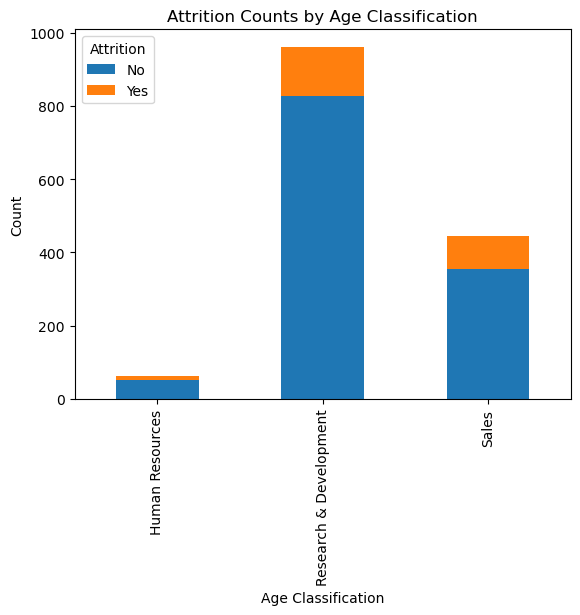

In [41]:
# Group the data by 'AgeClassification' and 'Attrition' and count the occurrences
attrition_counts = all_data.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)

# Plot a bar chart
attrition_counts.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Age Classification')
plt.ylabel('Count')
plt.title('Attrition Counts by Age Classification')

# Show the legend
plt.legend(title='Attrition', loc='upper left')

# Show the plot
plt.show()

# Attrition By Gender

In [44]:
values = all_data[all_data['Attrition']=='Yes'].groupby('Gender')['Attrition'].size().reset_index()
print(values)

   Gender  Attrition
0  Female         87
1    Male        150


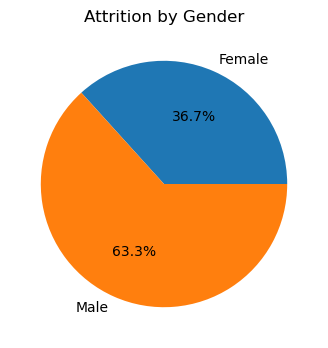

In [45]:
plt.figure(figsize=(4,4))
plt.pie(values['Attrition'], labels= values['Gender'] , autopct = '%1.1f%%')
plt.title('Attrition by Gender')
plt.show()

# Attrition By Marital Status

In [52]:
values = all_data[all_data['Attrition']=='Yes'].groupby('MaritalStatus')['Attrition'].size().reset_index()
print(values)

  MaritalStatus  Attrition
0      Divorced         33
1       Married         84
2        Single        120


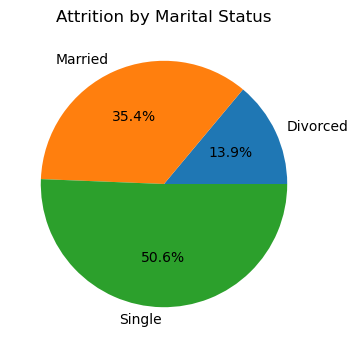

In [53]:
plt.figure(figsize=(4,4))
plt.pie(values['Attrition'], labels= values['MaritalStatus'] , autopct = '%1.1f%%')
plt.title('Attrition by Marital Status')
plt.show()

# Attrition By Education Field

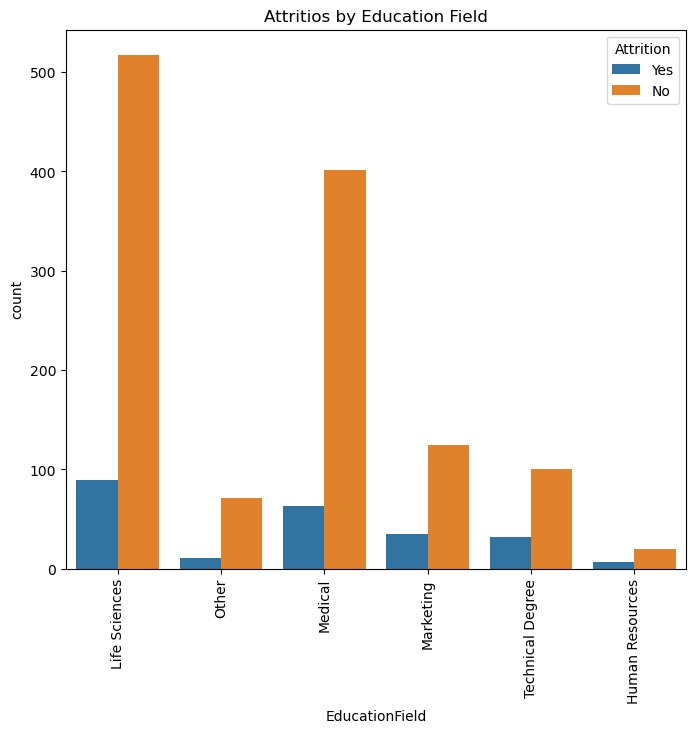

In [50]:
# Plot a bar chart
plt.figure(figsize=(8,7))
sns.countplot(data=all_data , x='EducationField', hue = 'Attrition')
plt.xticks(rotation = 90)
plt.title('Attritios by Education Field')

# Show the legend
plt.legend(title='Attrition', loc='upper right')

# Show the plot
plt.show()

# Attrition By Job Role

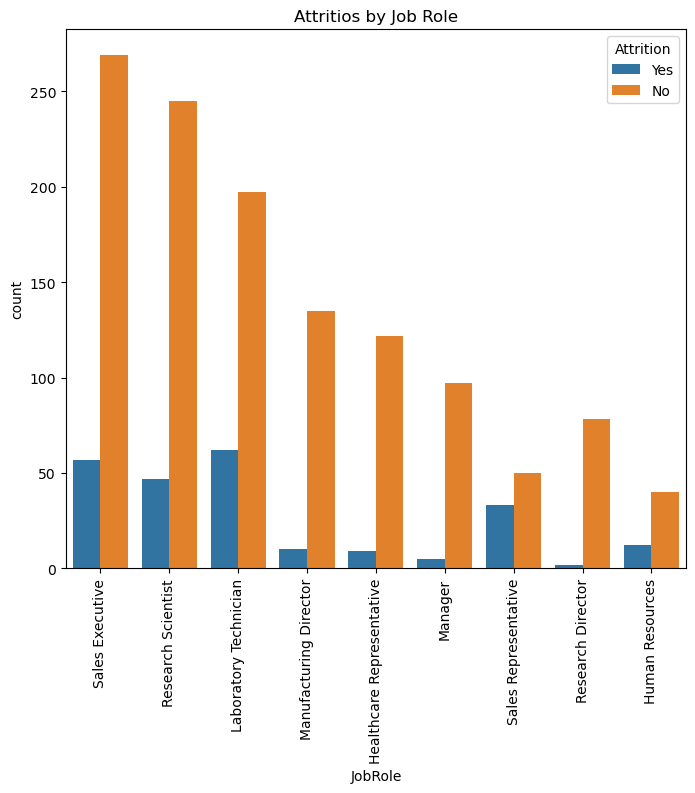

In [51]:
# Plot a bar chart
plt.figure(figsize=(8,7))
sns.countplot(data=all_data , x='JobRole', hue = 'Attrition')
plt.xticks(rotation = 90)
plt.title('Attritios by Job Role')

# Show the legend
plt.legend(title='Attrition', loc='upper right')

# Show the plot
plt.show()

# Attrition By Work Life Balance

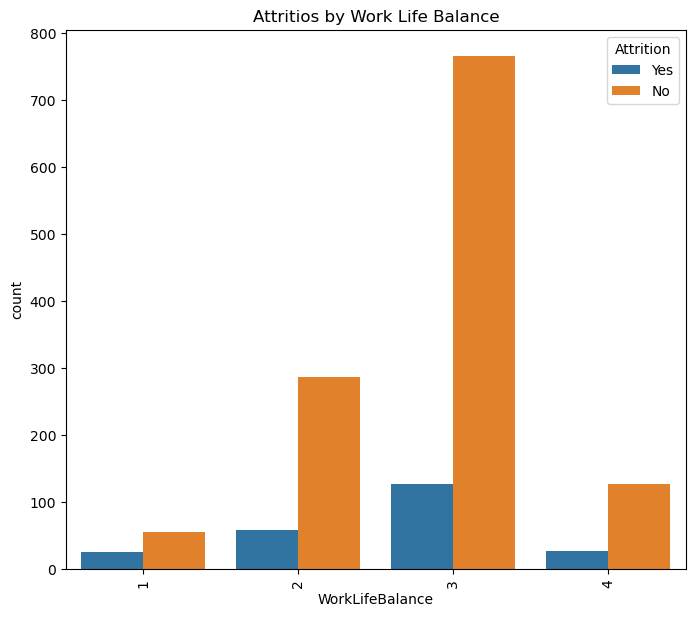

In [74]:
# Plot a bar chart
plt.figure(figsize=(8,7))
sns.countplot(data=all_data , x='WorkLifeBalance', hue = 'Attrition')
plt.xticks(rotation = 90)
plt.title('Attritios by Work Life Balance')

# Show the legend
plt.legend(title='Attrition', loc='upper right')

# Show the plot
plt.show()

# Attrition By Training Times Last Year

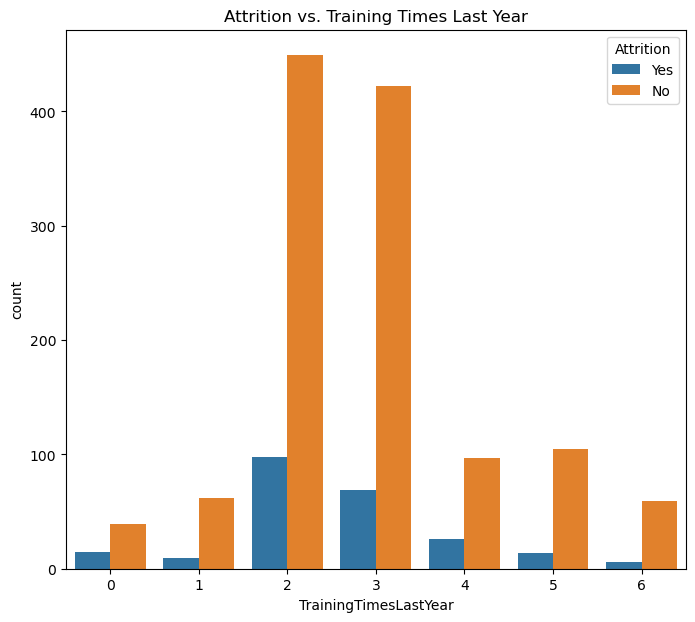

In [75]:
#Are employees with more training more likely to stay?
plt.figure(figsize=(8, 7))
sns.countplot(x='TrainingTimesLastYear', hue='Attrition', data=all_data)
plt.title('Attrition by Training Times Last Year')
plt.show()

# Attrition By Age

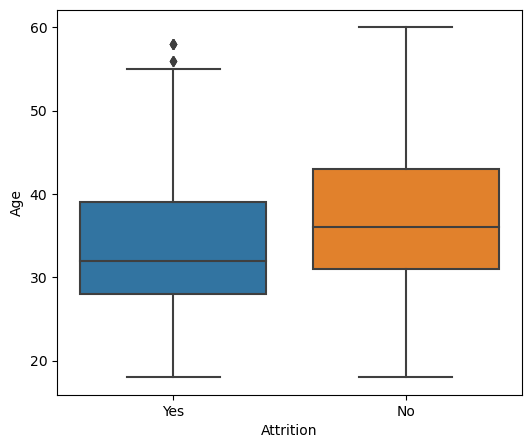

In [19]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Attrition',y='Age' , data = all_data)
plt.show()

# Attrition By Age

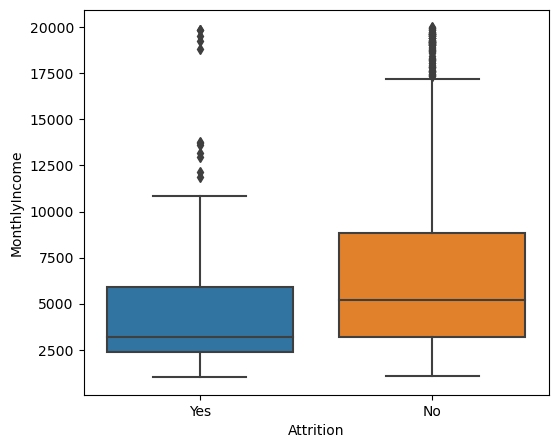

In [72]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Attrition',y='MonthlyIncome' , data = all_data)
plt.show()

# Attrition By Job Satisfaction 

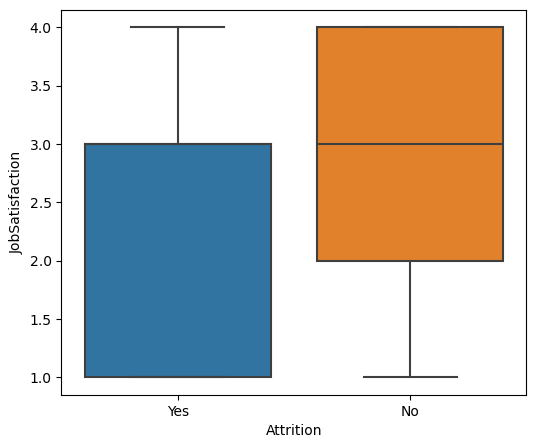

In [73]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Attrition',y='JobSatisfaction' , data = all_data)
plt.show()

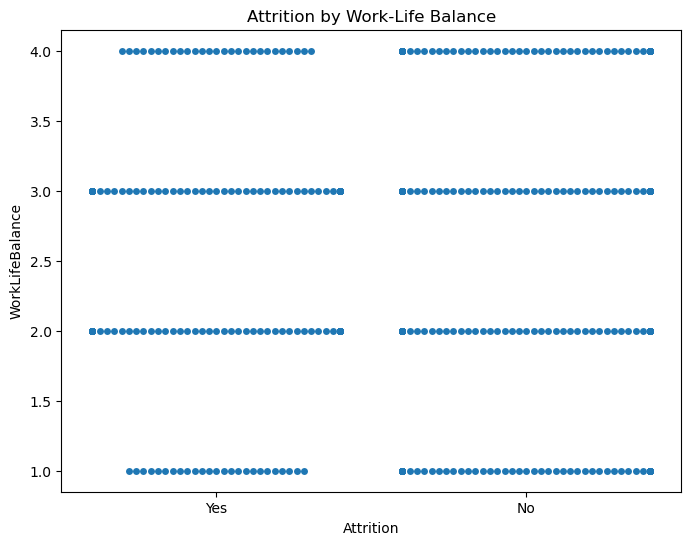

In [64]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Attrition', y='WorkLifeBalance', data=all_data)
plt.title('Attrition by Work-Life Balance')
plt.show()

# Years at Company vs job Level

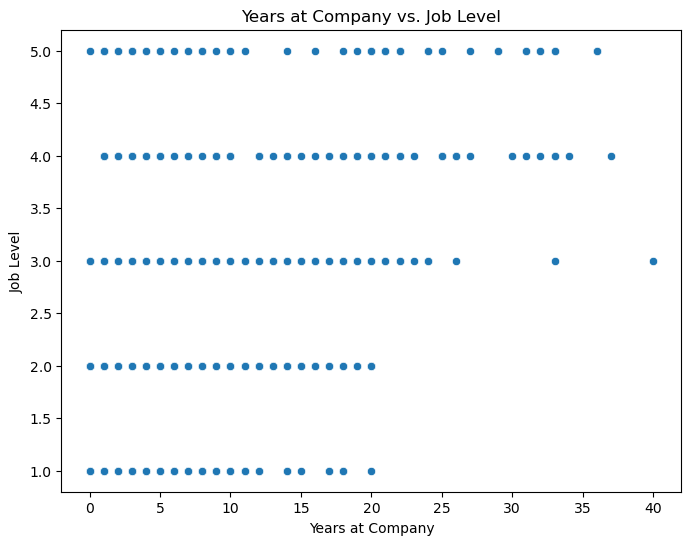

In [76]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsAtCompany', y='JobLevel', data=all_data)
plt.xlabel('Years at Company')
plt.ylabel('Job Level')
plt.title('Years at Company vs. Job Level')
plt.show()

# Correlation 

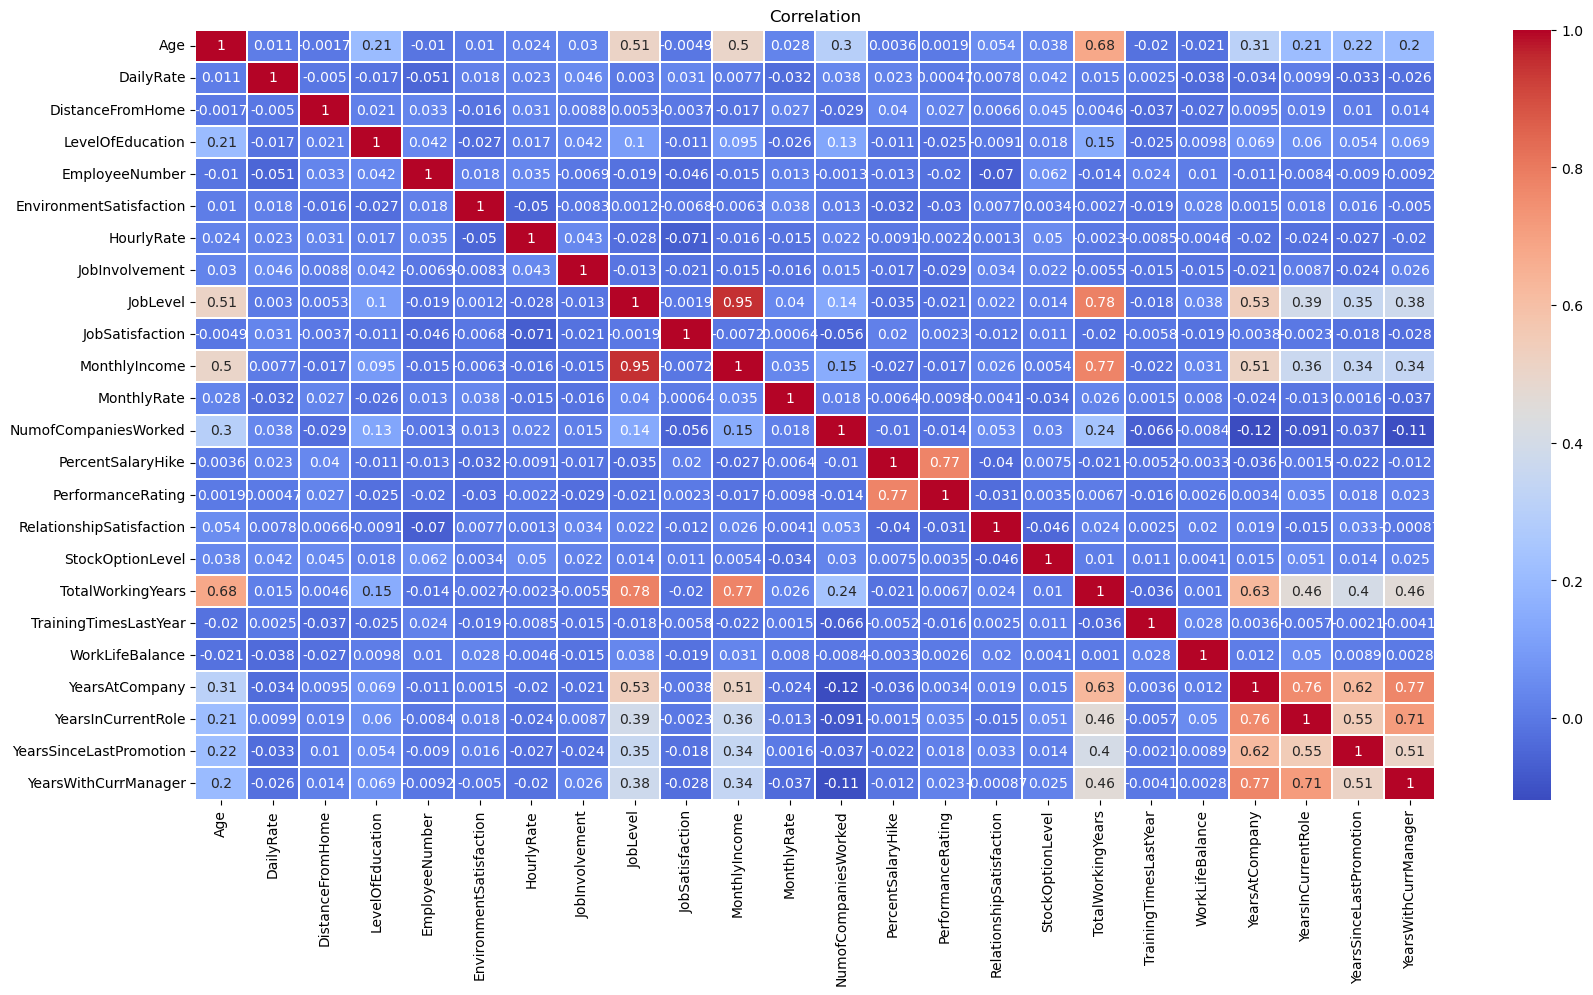

In [71]:
plt.figure(figsize=(20, 10))
sns.heatmap(all_data.corr(), annot= True,cmap = 'coolwarm', linewidth = 0.35)
plt.title('Correlation')
plt.show()